# Exploratory Data Analysis for UofT Edges Dataset

In [1]:
#!pip install libraries
#!pip install seaborn
#!pip install bioinfokit
#!pip install statsmodels
#!pip install scikit_posthocs
#!pip install pingouin

In [2]:
#Libraries 
import pandas as edges 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

from sklearn.linear_model import LinearRegression

import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

import scipy
from scipy import stats

from bioinfokit.analys import stat


# Getting to Know Dataset

Importing and checking columns, rows, datatype, and dimension.

In [3]:
#Import csv file as pandas dataframe
edges = edges.read_csv('UofT_edges.csv')
edges.head()

,source,target,emt
0,983859.0,544485.0,503.807815
1,605618.0,362627.0,5157.568486
2,323189.0,118238.0,498.628481
3,919153.0,983859.0,401.962668
4,995748.0,983859.0,5095.458776


In [4]:
#Exploring data characteristics
edges.describe()

,source,target,emt
count,4.662330e+05,4.662330e+05,466233.000000
mean,4.999237e+05,4.996089e+05,1080.340028
std,2.885814e+05,2.885656e+05,1305.276141
min,7.000000e+00,5.000000e+00,56.912763
25%,2.509160e+05,2.498470e+05,155.783331
50%,4.998480e+05,4.983410e+05,393.821975
75%,7.503390e+05,7.498650e+05,1516.447882
max,1.000674e+06,1.000674e+06,5394.814418


In [5]:
for col in edges.columns: 
    print(col) 

source
target
emt


In [6]:
#Checking data types in dataframe
col_types = edges.dtypes
col_types

source    float64
target    float64
emt       float64
dtype: object

In [7]:
#Checking dimensions of the dataframe
dims = edges.shape
dims

(466233, 3)

In [10]:
#Unique value counts for Occuptations
Source_freqs = edges['source'].value_counts()
Source_freqs

23797.0     14
637592.0    14
580800.0    13
681115.0    13
762214.0    13
            ..
124922.0     1
576596.0     1
63208.0      1
548278.0     1
758280.0     1
Name: source, Length: 240826, dtype: int64

In [11]:
#Unique value counts for Country Risk Income
target_freqs = edges['target'].value_counts()
target_freqs

547346.0    15
402152.0    15
648909.0    14
974277.0    13
591214.0    13
            ..
717589.0     1
195945.0     1
584523.0     1
334728.0     1
137297.0     1
Name: target, Length: 241285, dtype: int64

In [12]:
#Unique value counts for Country Risk Residency
emt_freqs = edges['emt'].value_counts()
emt_freqs

503.807815     1
94.396489      1
4076.362659    1
1445.442226    1
108.625267     1
              ..
164.025471     1
145.820487     1
2242.982729    1
391.362974     1
100.431608     1
Name: emt, Length: 466233, dtype: int64

# Data Cleaning

Cleaning edges dataset using tidy data principles.

In [15]:
edges.isnull().values.any().sum()

0

In [16]:
#Calculate the number of missing values in each column:
edges.isnull().sum()

source    0
target    0
emt       0
dtype: int64

<AxesSubplot:>

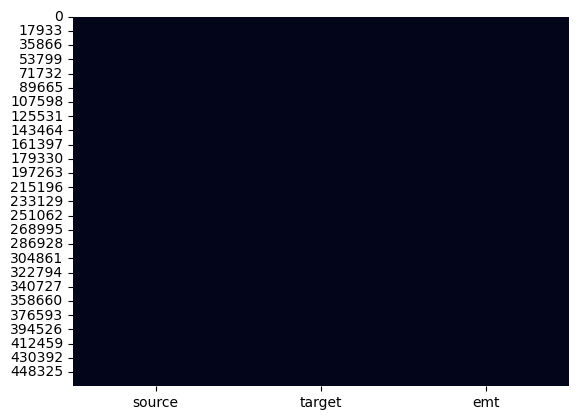

In [17]:
#Use a heatmap to visualize missing data
sns.heatmap(edges.isnull(), cbar=False)

In [18]:
edges.dropna()

,source,target,emt
0,983859.0,544485.0,503.807815
1,605618.0,362627.0,5157.568486
2,323189.0,118238.0,498.628481
3,919153.0,983859.0,401.962668
4,995748.0,983859.0,5095.458776
...,...,...,...
466228,743092.0,307628.0,2959.506391
466229,420266.0,489593.0,208.011081
466230,441447.0,877470.0,2221.199295
466231,444883.0,137297.0,1175.932049


# Correlations

In [19]:
#Overview of all correlations between all pairs of numerical columns
edges.corr()

,source,target,emt
source,1.000000,-0.000409,0.000620
target,-0.000409,1.000000,0.002468
emt,0.000620,0.002468,1.000000


In [20]:
edges.corr().style.background_gradient(cmap="Blues")

,source,target,emt
source,1.000000,-0.000409,0.000620
target,-0.000409,1.000000,0.002468
emt,0.000620,0.002468,1.000000
